<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/Bias_and_Variance_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

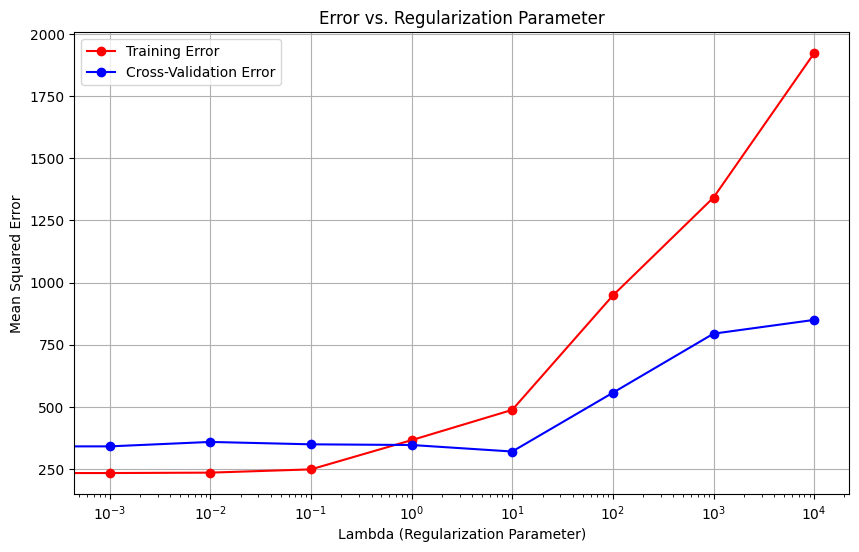

Best Lambda Value: 10


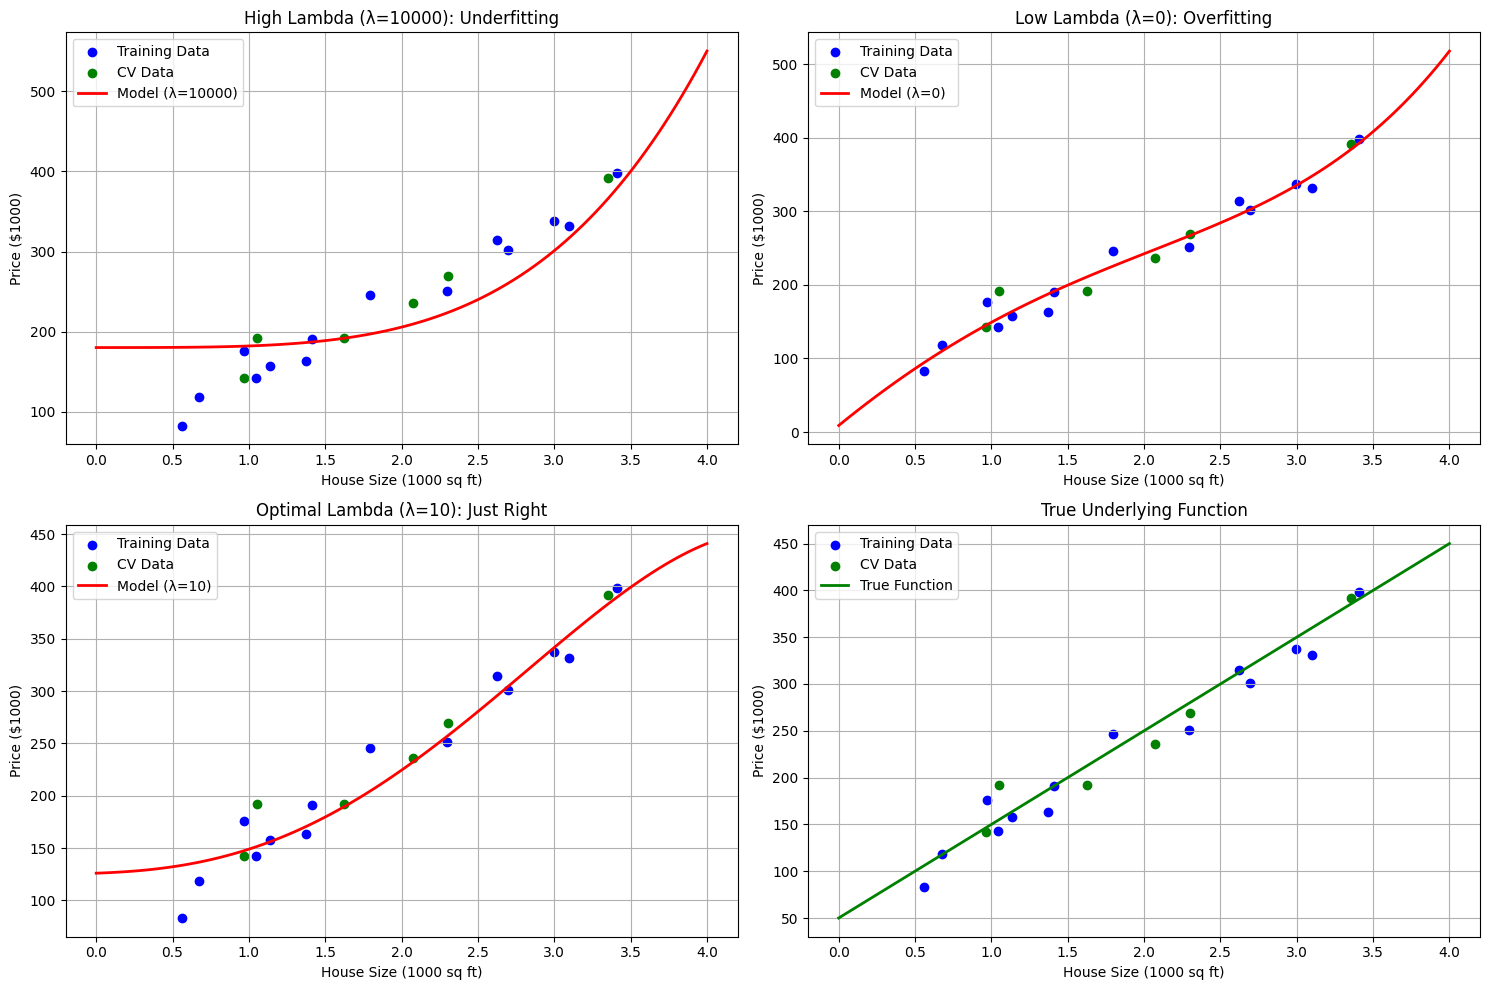


Model with Lambda = 10000:
Intercept (w0): 180.33
w1 (x^1 term): 0.04
w2 (x^2 term): 0.16
w3 (x^3 term): 0.46
w4 (x^4 term): 1.32

Model with Lambda = 0:
Intercept (w0): 8.89
w1 (x^1 term): 168.85
w2 (x^2 term): -27.71
w3 (x^3 term): -2.69
w4 (x^4 term): 1.75

Model with Lambda = 10:
Intercept (w0): 125.97
w1 (x^1 term): 5.19
w2 (x^2 term): 9.45
w3 (x^3 term): 10.34
w4 (x^4 term): -2.03


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# STEP 1: Generate some sample data (house size vs. price)
np.random.seed(42)  # For reproducibility
house_sizes = np.random.uniform(0.5, 3.5, 20)  # House sizes in 1000 sq ft
# True function: price = 50 + 100*size + some noise
house_prices = 50 + 100 * house_sizes + np.random.normal(0, 20, 20)

# STEP 2: Split data into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(
    house_sizes, house_prices, test_size=0.3, random_state=42
)

# STEP 3: Function to fit polynomial regression with regularization
def fit_polynomial_with_regularization(degree, lambda_value):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_cv_poly = poly.transform(X_cv.reshape(-1, 1))

    # Create a regularized regression model (Ridge regression uses L2 regularization)
    model = Ridge(alpha=lambda_value)

    # Train the model
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_cv_pred = model.predict(X_cv_poly)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    cv_error = mean_squared_error(y_cv, y_cv_pred)

    return model, poly, train_error, cv_error

# STEP 4: Try different lambda values and plot results
lambda_values = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_errors = []
cv_errors = []

# Polynomial degree
degree = 4

# Calculate errors for each lambda
for lambda_value in lambda_values:
    _, _, train_error, cv_error = fit_polynomial_with_regularization(degree, lambda_value)
    train_errors.append(train_error)
    cv_errors.append(cv_error)

# Plot errors vs lambda
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_errors, 'r-o', label='Training Error')
plt.semilogx(lambda_values, cv_errors, 'b-o', label='Cross-Validation Error')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Regularization Parameter')
plt.legend()
plt.grid(True)
plt.show()

# STEP 5: Find the best lambda
best_lambda_index = np.argmin(cv_errors)
best_lambda = lambda_values[best_lambda_index]
print(f"Best Lambda Value: {best_lambda}")

# STEP 6: Visualize models with different lambda values
plt.figure(figsize=(15, 10))

# Create a range of house sizes for prediction
X_range = np.linspace(0, 4, 100).reshape(-1, 1)

# 1. High Lambda (λ = 10000) - Underfitting
plt.subplot(2, 2, 1)
model_high_lambda, poly_high, _, _ = fit_polynomial_with_regularization(degree, 10000)
X_range_poly = poly_high.transform(X_range)
y_pred = model_high_lambda.predict(X_range_poly)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_cv, y_cv, color='green', label='CV Data')
plt.plot(X_range, y_pred, 'r-', linewidth=2, label='Model (λ=10000)')
plt.title('High Lambda (λ=10000): Underfitting')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($1000)')
plt.legend()
plt.grid(True)

# 2. Low Lambda (λ = 0) - Overfitting
plt.subplot(2, 2, 2)
model_low_lambda, poly_low, _, _ = fit_polynomial_with_regularization(degree, 0)
X_range_poly = poly_low.transform(X_range)
y_pred = model_low_lambda.predict(X_range_poly)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_cv, y_cv, color='green', label='CV Data')
plt.plot(X_range, y_pred, 'r-', linewidth=2, label='Model (λ=0)')
plt.title('Low Lambda (λ=0): Overfitting')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($1000)')
plt.legend()
plt.grid(True)

# 3. Optimal Lambda - Just Right
plt.subplot(2, 2, 3)
model_best_lambda, poly_best, _, _ = fit_polynomial_with_regularization(degree, best_lambda)
X_range_poly = poly_best.transform(X_range)
y_pred = model_best_lambda.predict(X_range_poly)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_cv, y_cv, color='green', label='CV Data')
plt.plot(X_range, y_pred, 'r-', linewidth=2, label=f'Model (λ={best_lambda})')
plt.title(f'Optimal Lambda (λ={best_lambda}): Just Right')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($1000)')
plt.legend()
plt.grid(True)

# 4. True Function
plt.subplot(2, 2, 4)
true_function = 50 + 100 * X_range.flatten()

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_cv, y_cv, color='green', label='CV Data')
plt.plot(X_range, true_function, 'g-', linewidth=2, label='True Function')
plt.title('True Underlying Function')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($1000)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# STEP 7: Print the parameters for models with different lambda values
# Get the model coefficients
def print_model_coefficients(model, lambda_value):
    coeffs = model.coef_
    intercept = model.intercept_
    print(f"\nModel with Lambda = {lambda_value}:")
    print(f"Intercept (w0): {intercept:.2f}")
    for i, coef in enumerate(coeffs[1:], 1):  # Skip the intercept term in coef_
        print(f"w{i} (x^{i} term): {coef:.2f}")

# Print coefficients for high, low, and optimal lambda
print_model_coefficients(model_high_lambda, 10000)
print_model_coefficients(model_low_lambda, 0)
print_model_coefficients(model_best_lambda, best_lambda)

# What to observe:
# 1. How the parameters (w values) get smaller as lambda increases
# 2. How the model gets simpler (less wiggly) as lambda increases
# 3. How the optimal lambda gives a balance between training and CV error